##**Import Libraries**


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import os
import re
!pip install keras-tuner -q
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.7 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
MAIN_PATH="/content/drive/MyDrive/Practice/human+activity+recognition+using+smartphones"
DATA_FOLDER_PATH=f"{MAIN_PATH}/UCI HAR Dataset/UCI HAR Dataset"
os.listdir(DATA_FOLDER_PATH)

['features_info.txt',
 '.DS_Store',
 'README.txt',
 'activity_labels.txt',
 'features.txt',
 'train',
 'test']

In [4]:
TRAIN_FOLDER_PATH=f"{DATA_FOLDER_PATH}/train"
TEST_FOLDER_PATH=f"{DATA_FOLDER_PATH}/test"
os.listdir(TRAIN_FOLDER_PATH)

['subject_train.txt', 'X_train.txt', 'y_train.txt', 'Inertial Signals']

In [ ]:
os.listdir(TEST_FOLDER_PATH)

['subject_test.txt', 'X_test.txt', 'y_test.txt', 'Inertial Signals']


# **Prepare and Preproccess Data**

In [ ]:
def read_file(file_path):
  with open(file_path,"r") as f:
    new_var=f.read().strip().split("\n")
  return new_var

In [ ]:
columns_names=read_file(f"{DATA_FOLDER_PATH}/features.txt")
activity_labels=read_file(f"{DATA_FOLDER_PATH}/activity_labels.txt")
x_train=read_file(f"{TRAIN_FOLDER_PATH}/X_train.txt")
y_train=read_file(f"{TRAIN_FOLDER_PATH}/y_train.txt")
len(columns_names)
columns_names=[re.sub(r"\d+", "", i).strip() for i in columns_names]
activity_labels2=[re.sub(r"\d+", "", i).strip() for i in activity_labels]
x_train=[" ".join(i.split()).split(" ") for i in x_train]
activity_info=[activity_labels2[int(i)-1] for i in y_train]


print(f"Sample from Features names {columns_names[0:5]}")
print(f"Features Length : {len(columns_names)}")
print(f"Target labels {activity_labels}")
print(f"X_train has {len(x_train)} sample")
print(f"y_train has {len(y_train)} sample ")
print(f"Sample from X_train {x_train[0]} \nand its label {y_train[0]} its corresponding activaty {activity_info[0]}")


Sample from Features names ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y']
Features Length : 561
Target labels ['1 WALKING', '2 WALKING_UPSTAIRS', '3 WALKING_DOWNSTAIRS', '4 SITTING', '5 STANDING', '6 LAYING']
X_train has 7352 sample
y_train has 7352 sample 
Sample from X_train ['2.8858451e-001', '-2.0294171e-002', '-1.3290514e-001', '-9.9527860e-001', '-9.8311061e-001', '-9.1352645e-001', '-9.9511208e-001', '-9.8318457e-001', '-9.2352702e-001', '-9.3472378e-001', '-5.6737807e-001', '-7.4441253e-001', '8.5294738e-001', '6.8584458e-001', '8.1426278e-001', '-9.6552279e-001', '-9.9994465e-001', '-9.9986303e-001', '-9.9461218e-001', '-9.9423081e-001', '-9.8761392e-001', '-9.4321999e-001', '-4.0774707e-001', '-6.7933751e-001', '-6.0212187e-001', '9.2929351e-001', '-8.5301114e-001', '3.5990976e-001', '-5.8526382e-002', '2.5689154e-001', '-2.2484763e-001', '2.6410572e-001', '-9.5245630e-002', '2.7885143e-001', '-4.6508457e-001', '4.91935

# **Handle Inertial Signals Data files**

In [5]:
_train_files=os.listdir(f"{TRAIN_FOLDER_PATH}/Inertial Signals")
_train_files

['body_acc_x_train.txt',
 'body_acc_y_train.txt',
 'total_acc_x_train.txt',
 'body_gyro_y_train.txt',
 'body_gyro_x_train.txt',
 'body_gyro_z_train.txt',
 'body_acc_z_train.txt',
 'total_acc_z_train.txt',
 'total_acc_y_train.txt']

In [6]:
_test_files=os.listdir(f"{TEST_FOLDER_PATH}/Inertial Signals")
_test_files

['body_gyro_y_test.txt',
 'body_acc_z_test.txt',
 'total_acc_x_test.txt',
 'body_gyro_x_test.txt',
 'total_acc_y_test.txt',
 'body_gyro_z_test.txt',
 'total_acc_z_test.txt',
 'body_acc_y_test.txt',
 'body_acc_x_test.txt']

In [7]:
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
    ]

In [8]:

def prepare_data(signals,FOLDER_NAME,subset):
  data=[]
  for i in signals:
    # print(f"{i} \n")
    df=pd.read_csv(f"{FOLDER_NAME}/Inertial Signals/{i}_{subset}.txt",sep=r"\s+", header=None)
    data.append(df.to_numpy())
  return np.transpose(data,(1,2,0))


In [9]:
#Data
_test_data=prepare_data(SIGNALS,TEST_FOLDER_PATH,"test")
_train_data=prepare_data(SIGNALS,TRAIN_FOLDER_PATH,"train")

# Labels
_train_labels=pd.read_csv(f"{TRAIN_FOLDER_PATH}/y_train.txt",sep=r"\s+", header=None)[0]
_train_labels=pd.get_dummies(_train_labels).to_numpy()

_test_labels=pd.read_csv(f"{TEST_FOLDER_PATH}/y_test.txt",sep=r"\s+", header=None)[0]
_test_labels=pd.get_dummies(_test_labels).to_numpy()


print(f"train data shape {_train_data.shape}\n tests data shape {_test_data.shape}\n")
print(f" train labels  {len(_train_labels)} test labels  {len(_test_labels)}")


train data shape (7352, 128, 9)
 tests data shape (2947, 128, 9)

 train labels  7352 test labels  2947


# **Plot Data**

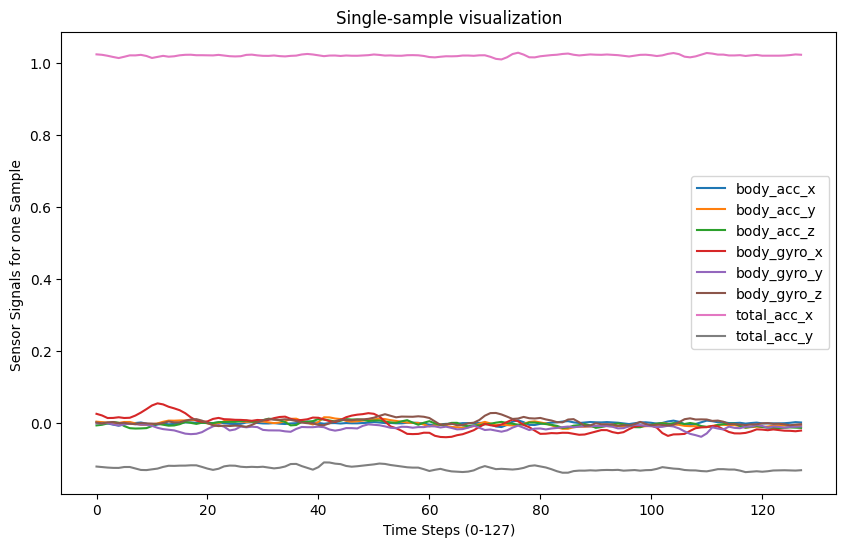

In [ ]:
# understand the shape, range, and periodicity of the raw signals.

import matplotlib.pyplot as plt
sample=_train_data[2]
plt.figure(figsize=(10,6))
for signal, i in zip(SIGNALS,range(8)):
  plt.plot(sample[:,i],label=signal)

plt.title("Single-sample visualization")
plt.xlabel("Time Steps (0-127)")
plt.ylabel("Sensor Signals for one Sample ")
plt.legend()
plt.show()



In [ ]:
#visually check how signals differ between activities
y_train=pd.DataFrame(y_train)
sample_each_group=y_train.groupby(0).sample(n=1)

In [ ]:
def get_sample(samples_from_each_group,activaty_index,sensor_index):
  """
  pick a channel for specific activities
  """
  _activity_sample_index=samples_from_each_group.index[activaty_index]
  _sensor_val=_train_data[_activity_sample_index][:,sensor_index]
  return _sensor_val ## 128 value for each time step for specific sensor to a spesific activity


def get_all_activities(samples_from_each_group,activity_indices,sensor_index):
  """
  get sensor value for all activities
  """
  return [get_sample(samples_from_each_group,i , sensor_index) for i  in activity_indices]



In [ ]:
my_samples_list=get_all_activities(sample_each_group,[0,1,2,3,4,5],0)

Text(0.5, 1.0, 'Different activity comparison')

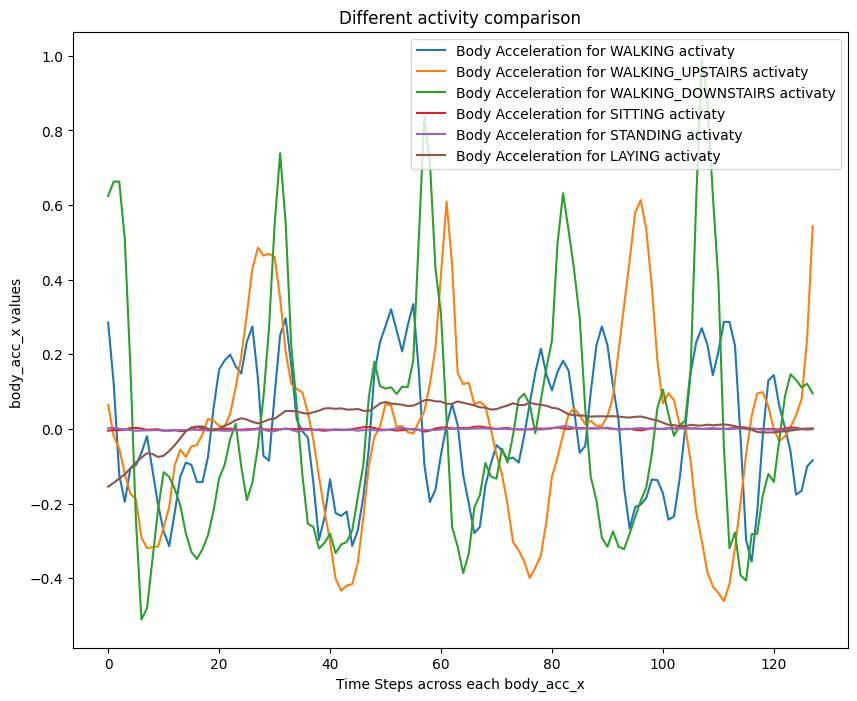

In [ ]:
plt.figure(figsize=(10,8))
for i,sample in enumerate(my_samples_list):
  plt.plot(sample,label=f"Body Acceleration for {activity_labels2[i]} activity")

plt.ylabel("body_acc_x values ")
plt.xlabel("Time Steps across each body_acc_x")
plt.legend(loc="upper right",title_fontsize =5)
plt.title("Different activity comparison")


# **Fine Tune LSTM**

In [31]:
from keras_tuner.tuners import RandomSearch
from keras.regularizers import L1L2
def build_model(hp):
  model =keras.Sequential()
  model.add(keras.Input(shape=(128,9)))
  for i in range( hp.Int("layers",max_value=5,min_value=1,step=1)):
    model.add(keras.layers.LSTM(hp.Int(f"units",min_value=32,max_value=320,step=32),return_sequences=True))
  if hp.Boolean("batch_norm"):
      model.add(keras.layers.BatchNormalization())
  if hp.Boolean("dropout"):
      rate=hp.Float("dropout_rate",min_value=0.1,max_value=0.5,step=0.1)
      model.add(keras.layers.Dropout(rate))
  model.add(keras.layers.LSTM(hp.Int(f"units",min_value=32,max_value=320,step=32),return_sequences=False))
  model.add(keras.layers.Dense(6,activation="sigmoid"))
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")),
  loss=keras.losses.CategoricalCrossentropy,metrics=["accuracy"])
  return model




In [32]:
from keras_tuner.tuners import RandomSearch
tuner=RandomSearch(build_model,
                   max_trials=1,
                  objective="val_accuracy",

                   )

In [33]:
tuner.search(_train_data,_train_labels,epochs=50,validation_split=0.3)

Trial 1 Complete [00h 03m 39s]
val_accuracy: 0.9428830742835999

Best val_accuracy So Far: 0.9428830742835999
Total elapsed time: 00h 03m 39s


In [34]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hp

In [35]:
model=tuner.hypermodel.build(best_hp)

In [36]:
tuner.search_space_summary()


Search space summary
Default search space size: 5
layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 320, 'step': 32, 'sampling': 'linear'}
batch_norm (Boolean)
{'default': False, 'conditions': []}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 128, 32)        │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 128, 32)        │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 128, 32)        │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,662 (119.77 KB)

 Trainable params: 30,598 (119.52 KB)

 Non-trainable params: 64 (256.00 B)

In [38]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
layers: 3
units: 32
batch_norm: True
dropout: False
lr: 0.0004700649201729334
Score: 0.9428830742835999


In [39]:
history=model.fit(_train_data,_train_labels,epochs=50,validation_split=0.3)

Epoch 1/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.5148 - loss: 1.2894 - val_accuracy: 0.6138 - val_loss: 1.0331
Epoch 2/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.8010 - loss: 0.5994 - val_accuracy: 0.7067 - val_loss: 0.7863
Epoch 3/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.8900 - loss: 0.3604 - val_accuracy: 0.8096 - val_loss: 0.5367
Epoch 4/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9115 - loss: 0.2644 - val_accuracy: 0.7788 - val_loss: 0.6499
Epoch 5/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9043 - loss: 0.2830 - val_accuracy: 0.9039 - val_loss: 0.3030
Epoch 6/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9391 - loss: 0.1808 - val_accuracy: 0.9003 - val_loss: 0.2991
Epoch 7/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9358 - loss: 0.1757 - val_accuracy: 0.9066 - val_loss: 0.2604
Epoch 8/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9402 - loss: 0.1619 - val_accu

# **Plot Data results**

/tmp/ipython-input-3644201628.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


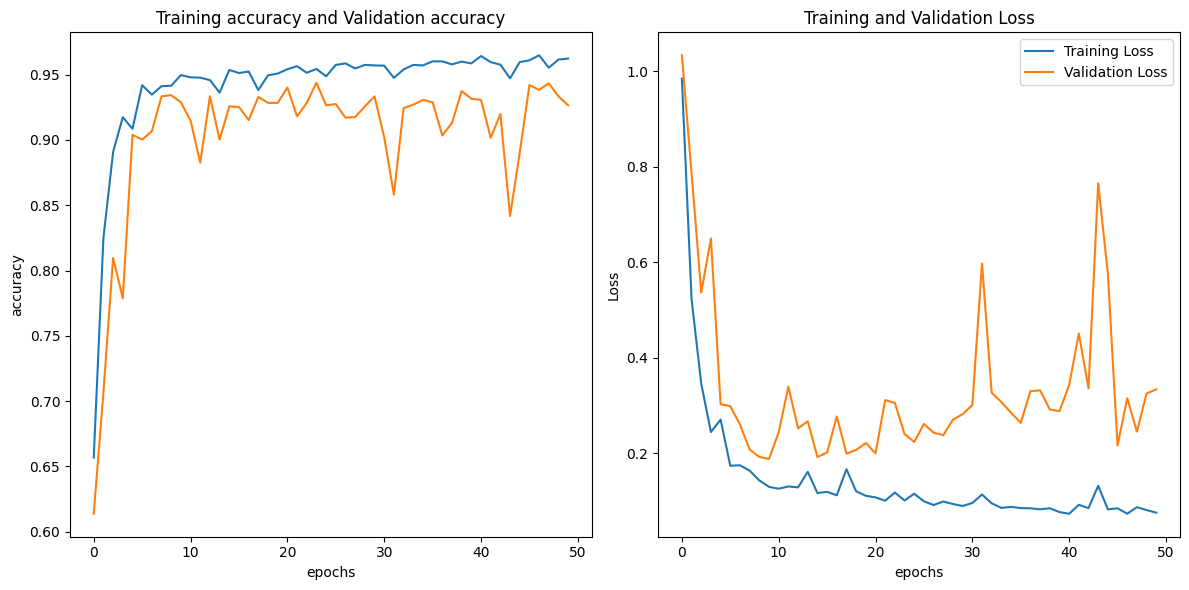

In [40]:
import matplotlib.pyplot as plt


fig,axes=plt.subplots(1,2,figsize=(12,6))

axes[0].plot(history.history["accuracy"],label="Training accuracy")
axes[0].plot(history.history["val_accuracy"],label="validation accuracy")
axes[0].set_title("Training accuracy and Validation accuracy")
axes[0].set_ylabel("accuracy")
axes[0].set_xlabel("epochs")

plt.legend()



axes[1].plot(history.history["loss"],label="Training Loss")
axes[1].plot(history.history["val_loss"],label="Validation Loss")
axes[1].set_title("Training and Validation Loss")
axes[1].set_ylabel("Loss")
axes[1].set_xlabel("epochs")

plt.tight_layout()
plt.legend()
plt.show()




# ***Model Evaluation***

In [41]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score


predict=model.predict(_test_data)

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [42]:
predict=np.argmax(predict, axis=1)

In [43]:
predict=pd.get_dummies(predict).to_numpy()


In [44]:
print(f" accuracy score \n {accuracy_score(_test_labels,predict)}")
print(f" F1 score \n {f1_score(_test_labels,predict,average="weighted")}")

 accuracy score 
 0.9043094672548354
 F1 score 
 0.9043824412494484


In [45]:
print(classification_report(_test_labels,predict))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       496
           1       0.94      0.92      0.93       471
           2       0.82      1.00      0.90       420
           3       0.83      0.80      0.82       491
           4       0.86      0.85      0.85       532
           5       1.00      1.00      1.00       537

   micro avg       0.90      0.90      0.90      2947
   macro avg       0.91      0.91      0.90      2947
weighted avg       0.91      0.90      0.90      2947
 samples avg       0.90      0.90      0.90      2947



In [48]:
predict=np.argmax(predict, axis=1)

In [47]:
_test_labels=np.argmax(_test_labels,axis=1)

In [49]:
print(confusion_matrix(_test_labels,predict))

[[435   1  60   0   0   0]
 [  4 432  35   0   0   0]
 [  0   1 419   0   0   0]
 [  0  24   0 392  75   0]
 [  0   2   0  78 452   0]
 [  0   2   0   0   0 535]]
